### Land Temperature Change

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [2]:
land_temperature_change = pd.read_csv("../Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
land_temperature_change.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [4]:
# Checking for missing values
missing_values = land_temperature_change.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Months Code            0
Months                 0
Year Code              0
Year                   0
Unit                   0
Value               6555
Flag                   0
Flag Description       0
dtype: int64


In [10]:
# Handling missing values if any
land_temperature_change_cleaned = land_temperature_change.dropna(axis=0).reset_index(drop=True)
land_temperature_change_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48250,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2018,2018,°c,0.311,E,Estimated value
48251,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2019,2019,°c,0.311,E,Estimated value
48252,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2020,2020,°c,0.311,E,Estimated value
48253,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2021,2021,°c,0.311,E,Estimated value


In [11]:
# Handling missing values if any
# land_temperature_change_cleaned = land_temperature_change.dropna(axis=1).reset_index(drop=True)
# land_temperature_change_cleaned

### Converting Categorial colunm to numbers

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in land_temperature_change_cleaned.columns:
    if land_temperature_change_cleaned[col].dtype == 'object':
        land_temperature_change_cleaned[col] = label_encoder.fit_transform(land_temperature_change_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(land_temperature_change_cleaned), columns=land_temperature_change_cleaned.columns)


In [13]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.387363,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.045455,0.045455,0.0,0.366920,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909,0.090909,0.0,0.471154,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136364,0.136364,0.0,0.417986,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.181818,0.181818,0.0,0.489577,0.0,0.0


### Model Training and Evaluation

In [15]:

# Select relevant features
selected_features = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']
land_temperature_change_selected = df_normalized[selected_features]


In [16]:
# Split the dataset into features (X) and target variable (y)
# X = consumer_prices_selected[['Area Code (M49)', 'Year', 'Item Code', 'Months Code']]
X = land_temperature_change_selected[['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit', 'Flag', 'Flag Description']]
y = land_temperature_change_selected['Value']


In [17]:
X.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Flag,Flag Description
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.045455,0.045455,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909,0.090909,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136364,0.136364,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.181818,0.181818,0.0,0.0,0.0


In [18]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

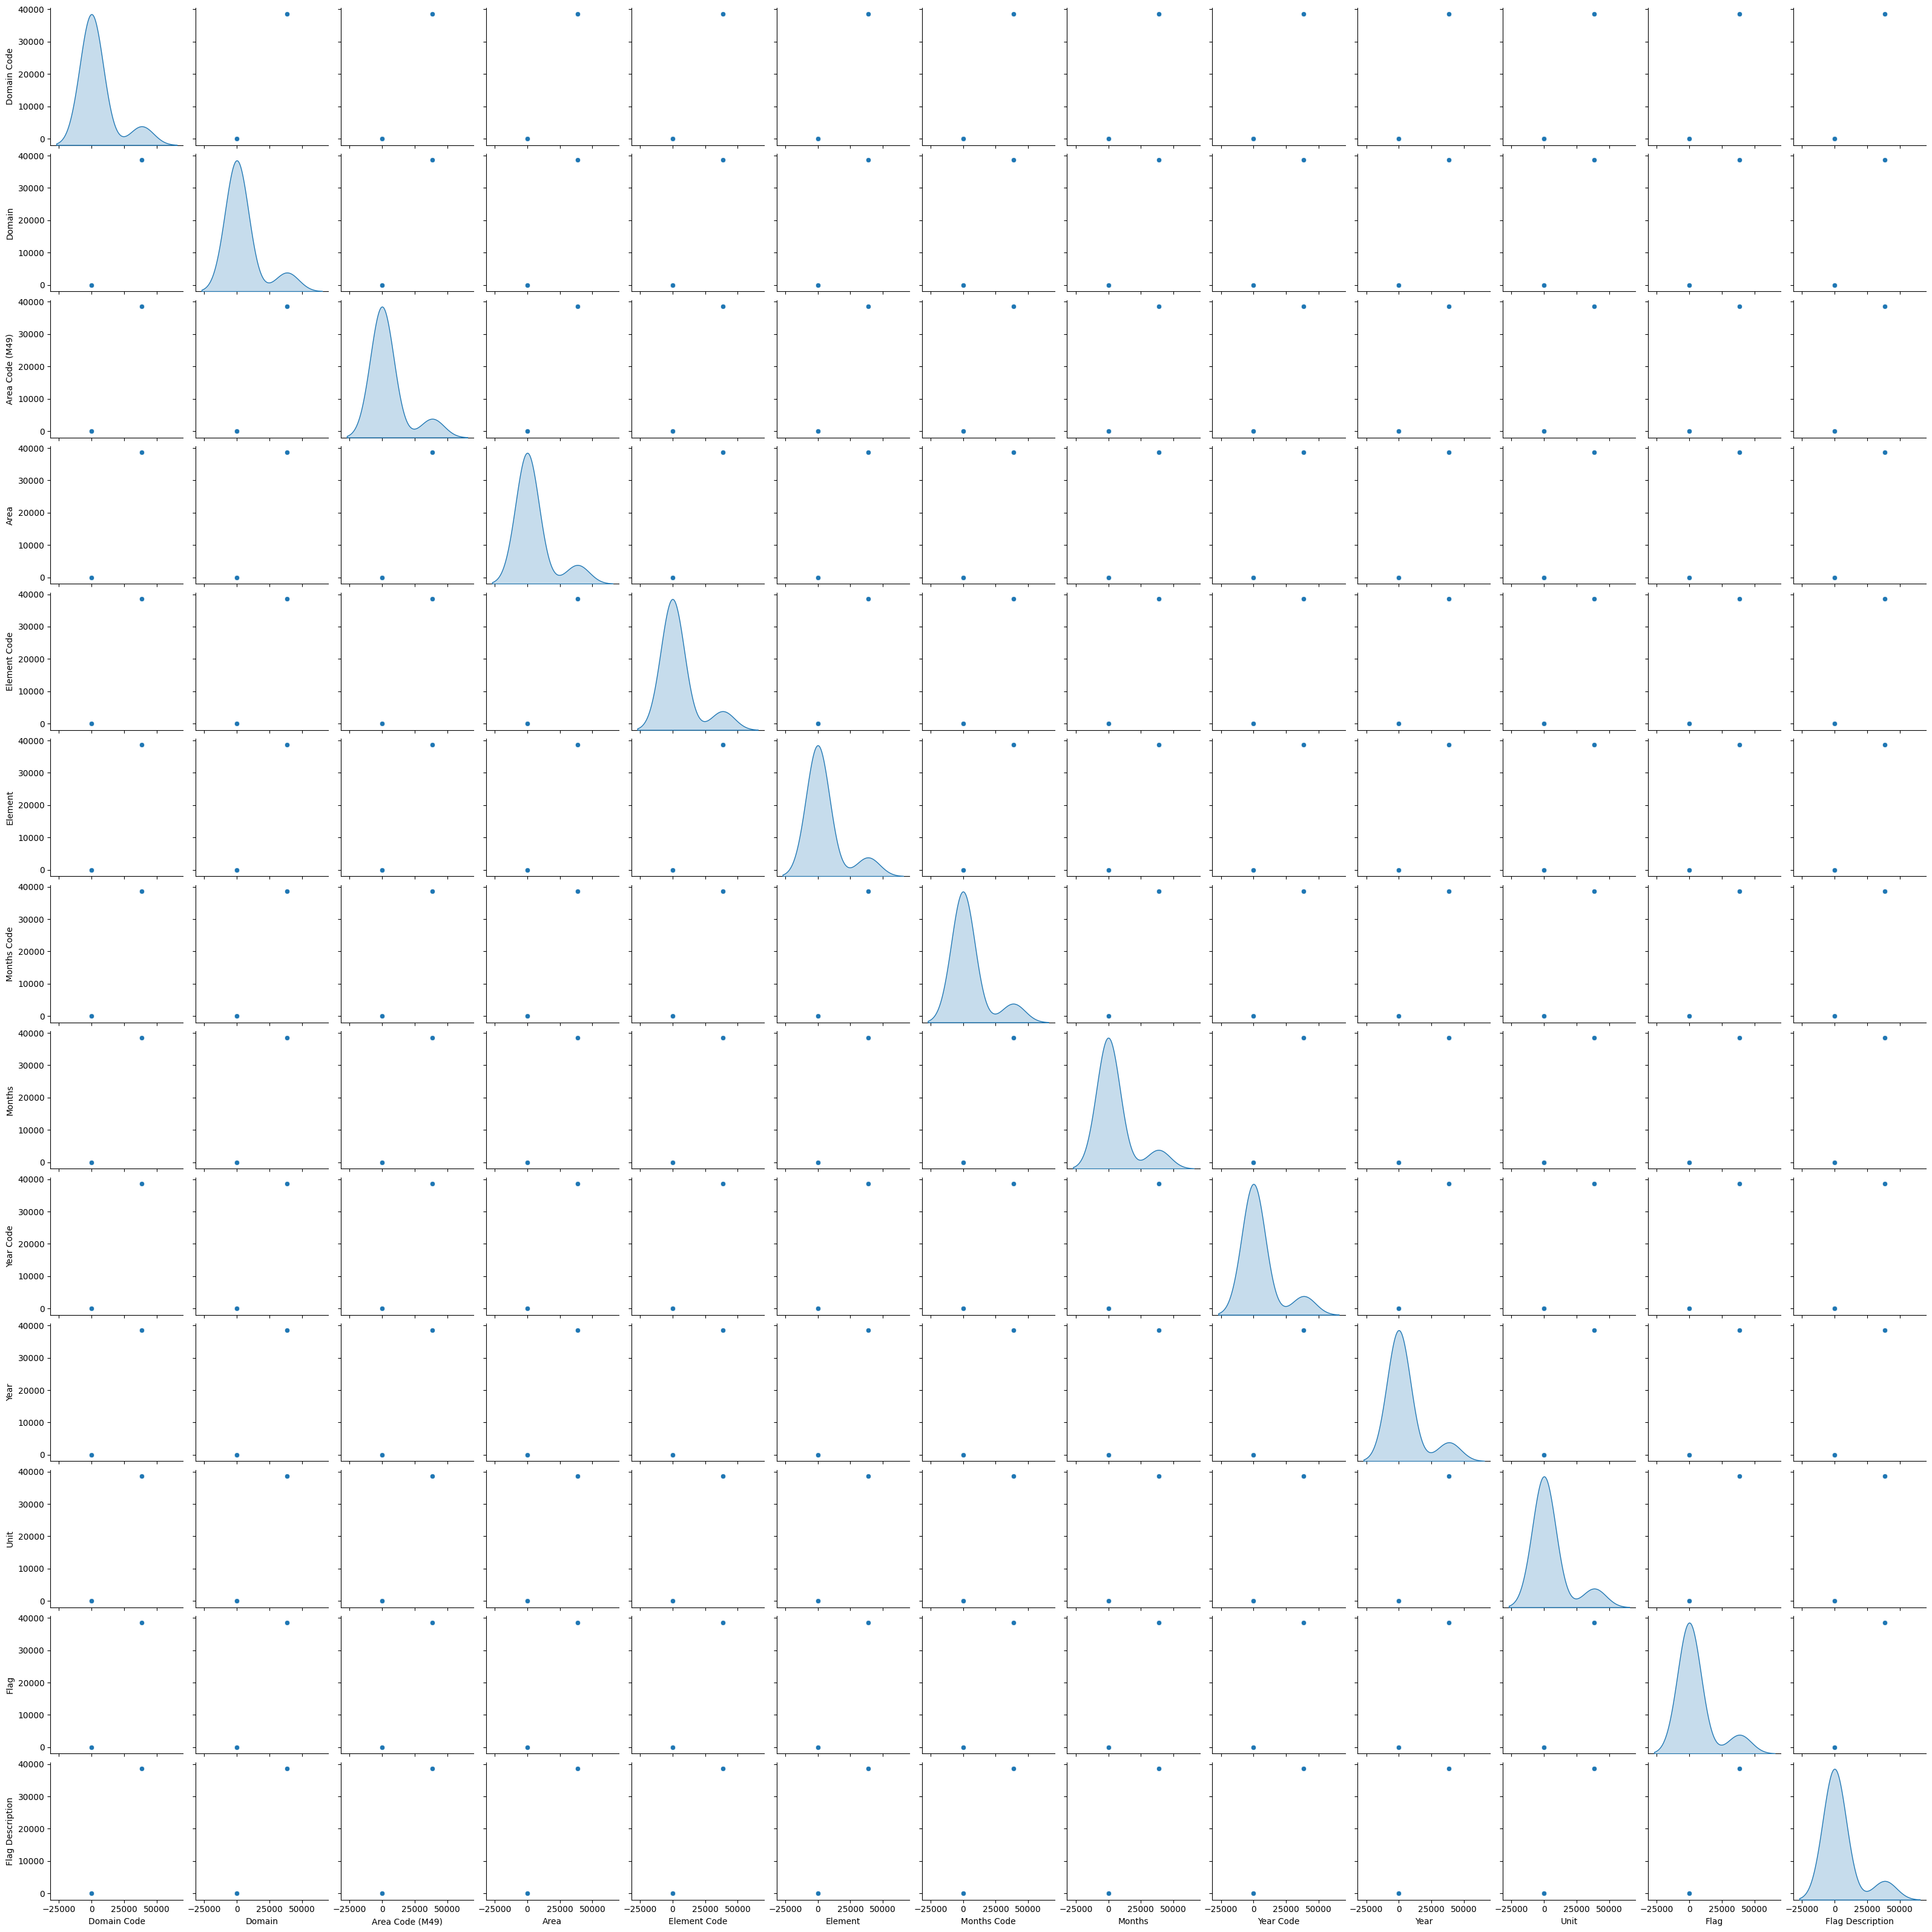

In [19]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 0.00233227179462705
Linear Regression Mean Absolute Error: 0.032052206928844244


In [22]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 0.0024244000662386974
MLP Regression Mean Absolute Error: 0.03336059334379172


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

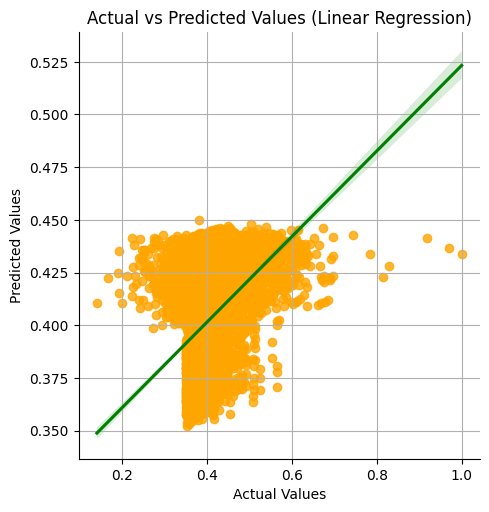

<Figure size 1000x600 with 0 Axes>

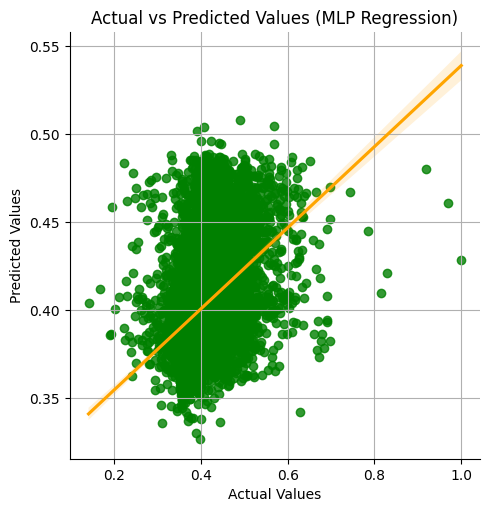

In [23]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


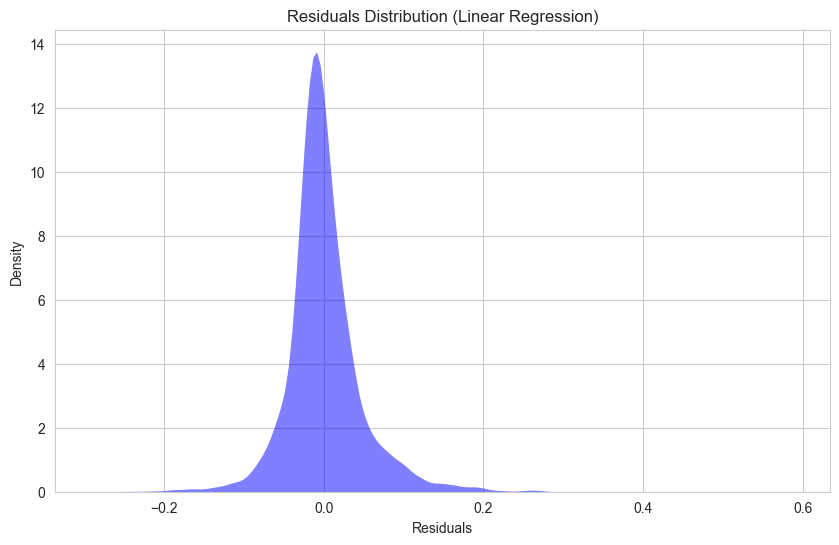

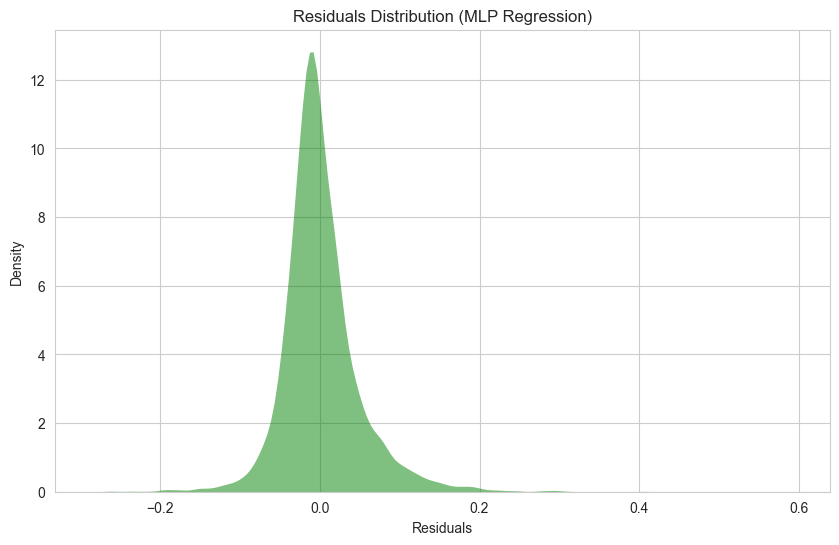

In [24]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.04883133 0.0493834  0.04677662 0.04815298 0.0482854 ]
Linear Regression Mean RMSE: 0.04828594590699546
MLP Cross-Validation RMSE Scores: [0.04749813 0.04864822 0.04574157 0.04673561 0.04683355]
MLP Mean RMSE: 0.04709141555849298


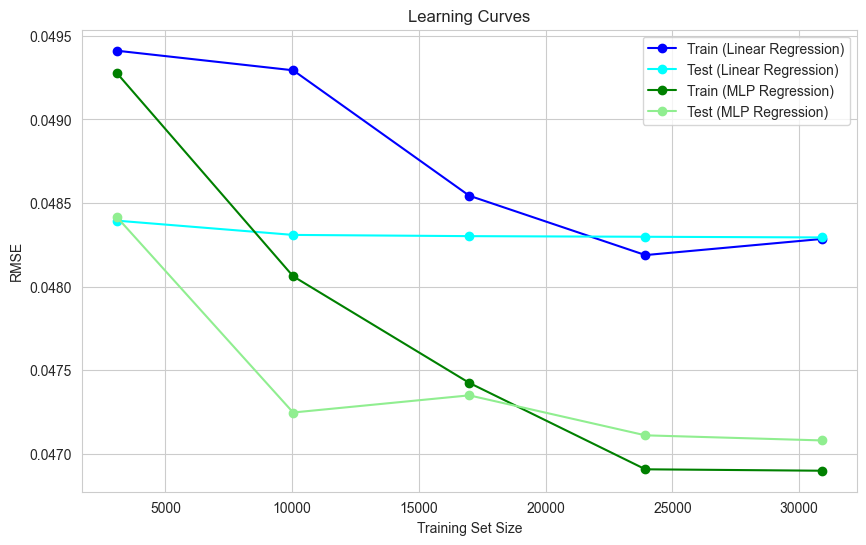

In [25]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.387363,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.045455,0.045455,0.0,0.366920,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909,0.090909,0.0,0.471154,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136364,0.136364,0.0,0.417986,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.181818,0.181818,0.0,0.489577,0.0,0.0


In [27]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Months Code,Months,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.387363,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.045455,0.0,0.366920,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909,0.0,0.471154,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136364,0.0,0.417986,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.181818,0.0,0.489577,0.0,0.0


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [28]:
area_column = land_temperature_change[['Area', 'Year Code']]

land_temperature_change_area_concat = pd.concat([df_normalized, area_column], axis=1)

land_temperature_change_area_concat.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Months Code,Months,Year,Unit,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.387363,0.0,0.0,Afghanistan,2000
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.045455,0.0,0.366920,0.0,0.0,Afghanistan,2001
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909,0.0,0.471154,0.0,0.0,Afghanistan,2002
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.136364,0.0,0.417986,0.0,0.0,Afghanistan,2003
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.181818,0.0,0.489577,0.0,0.0,Afghanistan,2004


### Model Deployment

In [30]:
from sklearn.impute import SimpleImputer

In [38]:
# Train a separate model for each geographical region and save them
regions = land_temperature_change_area_concat['Area'].unique()
for region in regions:
    region_data = land_temperature_change_area_concat[land_temperature_change_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']

    imputer = SimpleImputer(strategy='constant', fill_value=0)
    X_region = imputer.fit_transform(X_region)
    y_region = imputer.fit_transform(y_region.values.reshape(-1, 1)).flatten()
    
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_land_temperature_change/model_land_temperature_change_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Afghanistan.joblib
Model for Albania saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Albania.joblib
Model for Algeria saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Algeria.joblib
Model for American Samoa saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_American Samoa.joblib
Model for Andorra saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Andorra.joblib
Model for Angola saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Angola.joblib
Model for Anguilla saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Anguilla.joblib
Model for Antarctica saved as ../model_deployment/model_land_temperature_change/model_land_temperature_change_Antarctica.job

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\D

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025         24.710338
1  2026         24.722338
2  2027         24.734338

Forecast for Albania:
   Year  Forecasted_Value
0  2025         80.064273
1  2026         80.103616
2  2027         80.142958

Forecast for Algeria:
   Year  Forecasted_Value
0  2025         39.345247
1  2026         39.364475
2  2027         39.383704

Forecast for American Samoa:
   Year  Forecasted_Value
0  2025         65.298146
1  2026         65.330206
2  2027         65.362267

Forecast for Andorra:
   Year  Forecasted_Value
0  2025        113.893314
1  2026        113.949359
2  2027        114.005405

Forecast for Angola:
   Year  Forecasted_Value
0  2025         81.645045
1  2026         81.685183
2  2027         81.725320

Forecast for Anguilla:
   Year  Forecasted_Value
0  2025         46.816211
1  2026         46.839148
2  2027         46.862085

Forecast for Antarctica:
   Year  Forecasted_Value
0  2025         23.951983
1  2026         23.9636

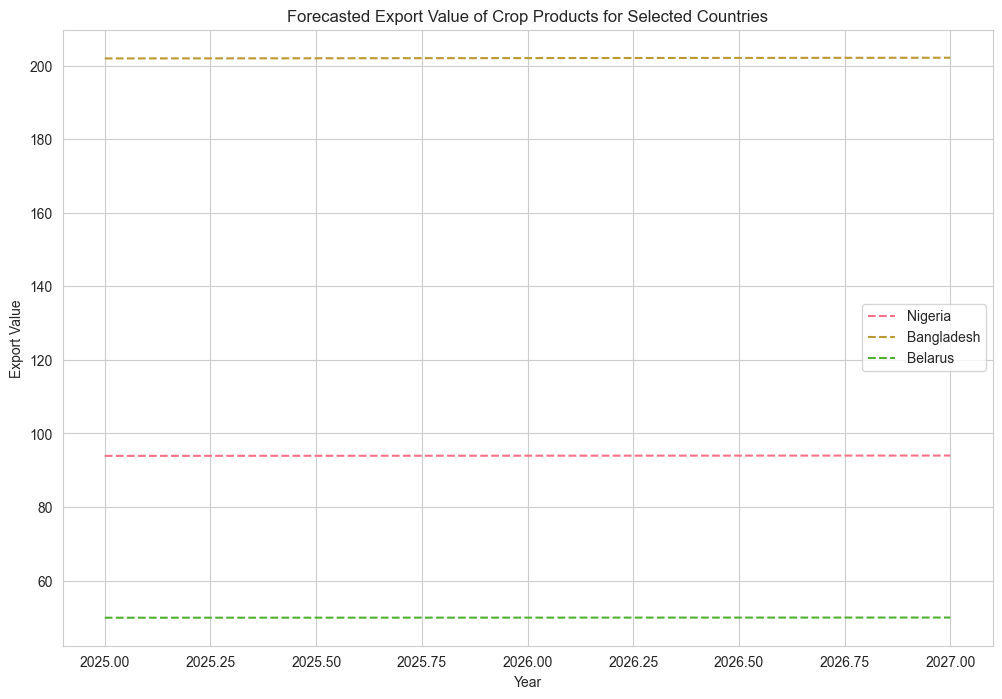

In [40]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_land_temperature_change/model_land_temperature_change_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = land_temperature_change_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Nigeria', 'Bangladesh', 'Belarus']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()
